# 공장을 만들꺼다 모델 공장

### 아이디어는 다음과 같습니다.

# 순서
### 1.전처리 : base 파일은 아무칼럼도 제거하지 않은 파일 -> 우리는 이 파일에서 몇개씩 칼럼을 제거하며 모델의 성능을 파악할 것임
        사용법 : 
        prepro() 함수를 사용하세요
        prepro("파일경로", ["삭제할 칼럼", "삭제할 칼럼2"]) --> 삭제할 칼럼 여러개를 집어넣어도 된다. 단 존재해야함
        prepro("파일경로") --> 삭제할 칼럼을 적지 않으면 삭제하지 않고 원핫인코딩한 pd를 리턴해준다
        df = prepro("파일경로") --> 이런식으로 df에 저장가능함
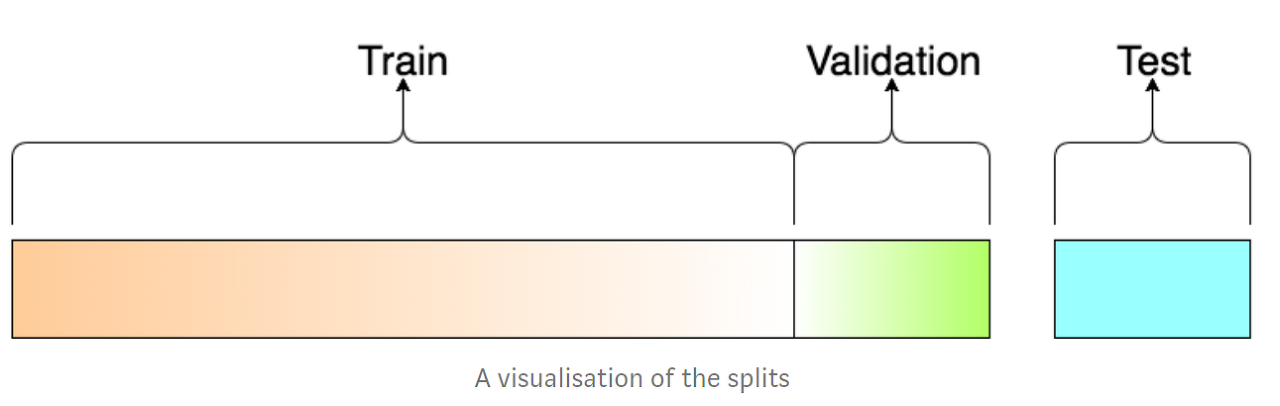
### 2.데이터 나누기 : 
        사용법 : 
        get() 함수를 사용하세요
        get("파일경로") --> 판다스 파일을 보내주면 알아서 train데이터 test데이터 validation데이터 나눠준다. 
                        비율은 train test가 8대2로 나눠지고 다시 train을 train validation으로 8대 2 나눔
        X_trn, y_trn, X_tst, y_tst, X_val, y_val = get('파일경로')  --> 이런식으로 리턴이 총6개 항목이기에 변수 6개에 넣어준다.

### 3.모델 여러개 만들기
        사용법 : 
                앞에 설명 존재


### 4.모델 여러개 cross validation 교차검증 하기 



### 5.최종 모델 선정